In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import DataLoader as dl

In [3]:
one_month_path = 'data_2014/2014-04'
one_month = dl.load_from_folder(one_month_path)
one_month

,Date,ApName,NumOfUsers,TransmittedFragments,MulticastTransmittedFrames,Retries,MultipleRetries,FrameDuplicates,RtsSuccesses,RtsFailures,...,MulticastReceivedFrames,FcsErrors,TransmittedFrames,WepUndecryptables,Failed,RxUtilization,TxUtilization,ChannelUtilization,NumOfClients,PoorSnrClients
0,2014-04-14--14-52,AP-A10-1,0.0,14774521.0,131551.0,5662658.0,1306510.0,381807.0,952656.0,1466153.0,...,245183.0,81516094.0,79399032.0,223.0,3424368.0,0.0,0.0,1.0,0.0,0.0
1,2014-04-14--14-52,AP-A10-2,3.0,8540639.0,131177.0,2150460.0,398176.0,229122.0,396845.0,1003393.0,...,256537.0,65034377.0,73044585.0,695.0,4154099.0,0.0,1.0,0.0,3.0,2.0
2,2014-04-14--14-52,AP-A10-3,6.0,13139144.0,144702.0,9995009.0,1843933.0,625167.0,2285312.0,4293308.0,...,353175.0,239663099.0,78530709.0,504.0,4509205.0,0.0,0.0,1.0,4.0,2.0
3,2014-04-14--14-52,AP-A10-4,9.0,15699366.0,140851.0,8014818.0,1434884.0,617579.0,1624348.0,3351060.0,...,307181.0,143787515.0,80902768.0,711.0,6746995.0,0.0,1.0,4.0,9.0,4.0
4,2014-04-14--14-52,AP-A10-5,0.0,2243936.0,120598.0,714558.0,160597.0,36788.0,78633.0,201601.0,...,239946.0,69051343.0,66436666.0,5.0,1227528.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75595,2014-04-30--23-58,AP-SKS-7c69.f626.7766,1.0,218447611.0,905610.0,29429584.0,4485734.0,626.0,10417819.0,19253747.0,...,0.0,226091050.0,219291573.0,579.0,1693167.0,0.0,1.0,3.0,1.0,0.0
75596,2014-04-30--23-58,AP-SKS-7c69.f626.77e0,0.0,6718654.0,799419.0,1418653.0,327974.0,0.0,392267.0,1415644.0,...,0.0,422373558.0,7505536.0,51.0,621839.0,0.0,1.0,16.0,1.0,0.0
75597,2014-04-30--23-58,AP-SKS-7c69.f626.77e1,0.0,7174166.0,892296.0,1333057.0,291299.0,8.0,346102.0,1029202.0,...,0.0,237781538.0,8021429.0,33.0,669293.0,0.0,1.0,9.0,1.0,1.0
75598,2014-04-30--23-58,AP-SKS-7c69.f640.db00,0.0,411040.0,770018.0,107090.0,26301.0,0.0,43147.0,23056.0,...,0.0,196946923.0,1180365.0,0.0,23630.0,0.0,1.0,0.0,0.0,0.0


In [4]:
date_users_clients = one_month[['Date', 'NumOfUsers', 'NumOfClients']]
date_users_clients

,Date,NumOfUsers,NumOfClients
0,2014-04-14--14-52,0.0,0.0
1,2014-04-14--14-52,3.0,3.0
2,2014-04-14--14-52,6.0,4.0
3,2014-04-14--14-52,9.0,9.0
4,2014-04-14--14-52,0.0,0.0
...,...,...,...
75595,2014-04-30--23-58,1.0,1.0
75596,2014-04-30--23-58,0.0,1.0
75597,2014-04-30--23-58,0.0,1.0
75598,2014-04-30--23-58,0.0,0.0


In [5]:
grouped_by_date = date_users_clients.groupby('Date', as_index=False).mean()
grouped_by_date

,Date,NumOfUsers,NumOfClients
0,2014-04-14--14-52,3.828571,4.000000
1,2014-04-14--14-54,3.647619,3.800000
2,2014-04-14--14-56,3.628571,3.695238
3,2014-04-14--14-58,3.752381,3.800000
4,2014-04-14--15-00,3.866667,3.952381
...,...,...,...
11789,2014-04-30--23-50,0.171429,0.800000
11790,2014-04-30--23-52,0.171429,0.800000
11791,2014-04-30--23-54,0.171429,0.800000
11792,2014-04-30--23-56,0.171429,0.800000


In [15]:
date_time = grouped_by_date['Date'].str.split('--', expand=True)
grouped_by_date_time = grouped_by_date.drop(columns=['Date'])
grouped_by_date_time[['Date', 'Time']] = date_time
grouped_by_date_time

,NumOfUsers,NumOfClients,Date,Time
0,3.828571,4.000000,2014-04-14,14-52
1,3.647619,3.800000,2014-04-14,14-54
2,3.628571,3.695238,2014-04-14,14-56
3,3.752381,3.800000,2014-04-14,14-58
4,3.866667,3.952381,2014-04-14,15-00
...,...,...,...,...
11789,0.171429,0.800000,2014-04-30,23-50
11790,0.171429,0.800000,2014-04-30,23-52
11791,0.171429,0.800000,2014-04-30,23-54
11792,0.171429,0.800000,2014-04-30,23-56


In [16]:
daily_sum = grouped_by_date_time.groupby('Date', as_index=False).sum()
daily_sum

,Date,NumOfUsers,NumOfClients
0,2014-04-14,484.409524,609.419048
1,2014-04-15,1305.921497,1610.046259
2,2014-04-16,833.903639,1182.169143
3,2014-04-17,249.733333,695.152381
4,2014-04-18,170.462781,589.266962
5,2014-04-19,108.103948,528.809833
6,2014-04-20,101.427274,527.524251
7,2014-04-21,109.526122,566.850711
8,2014-04-22,202.214778,669.535237
9,2014-04-23,1221.209524,1547.304762


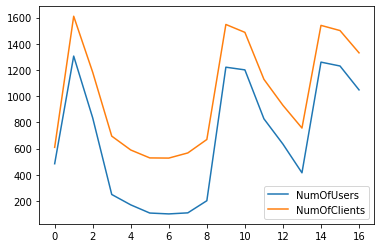

In [19]:
daily_sum.plot()

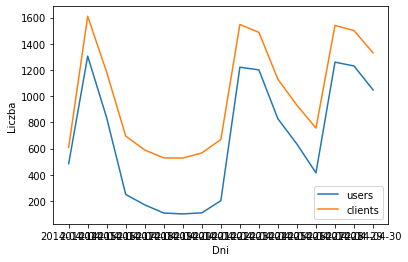

In [18]:
days = daily_sum['Date']
users = daily_sum['NumOfUsers']
clients = daily_sum['NumOfClients']

plt.plot(days, users)
plt.plot(days, clients)
plt.legend(['users', 'clients'])
plt.xlabel('Dni')
plt.ylabel('Liczba')
plt.show()